In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import jaccard_score, cohen_kappa_score, matthews_corrcoef

In [23]:
def calculate_jaccard_index(daisyinput, rebeccainput):
    """
    Calculates the Jaccard Index between two boolean (0/1) arrays.
    The Jaccard Index is defined as the size of the intersection divided by the size of the union.
    For binary data, this means:
    J(A, B) = |A intersect B| / |A union B|
    where A and B are sets of elements where the value is 1.
    """
    arr1_bool = np.array(daisyinput).astype(bool)
    arr2_bool = np.array(rebeccainput).astype(bool)
    intersection = np.sum(arr1_bool & arr2_bool)
    union = np.sum(arr1_bool | arr2_bool)
    if union == 0:
        return 0.0
    else:
        return intersection / union

In [ ]:
daisy = [1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
]

rebecca = [1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
]

In [25]:
print(len(daisy))
print(len(rebecca))
print(pearsonr(daisy, rebecca))

101
101
PearsonRResult(statistic=0.4494762304373057, pvalue=2.415917563582829e-06)


In [26]:

x = np.array(daisy)
y = np.array(rebecca)
overlap = x & y
print(overlap)

[0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [27]:
def jaccard_similarity(set1, set2):
    """
    Calculates the Jaccard similarity between two sets.

    Args:
        set1: The first set.
        set2: The second set.

    Returns:
        A float representing the Jaccard similarity, or 0.0 if the union is empty.
    """
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    if union == 0:
        return 0.0  # Avoid division by zero if both sets are empty
    else:
        return intersection / union
# daisy = {1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
# }

# rebecca = {1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
# }

# jaccard_similarity(daisy, rebecca)

In [28]:

cohen_kappa_score(x, y)

0.42153493699885447

In [29]:

jaccard_score(x, y)

0.9494949494949495

In [30]:

calculate_jaccard_index(x, y)

0.9494949494949495

In [31]:

matthews_corrcoef(x, y)

0.4494762304373056

Rebecca  0   1
Daisy         
0        2   4
1        1  94


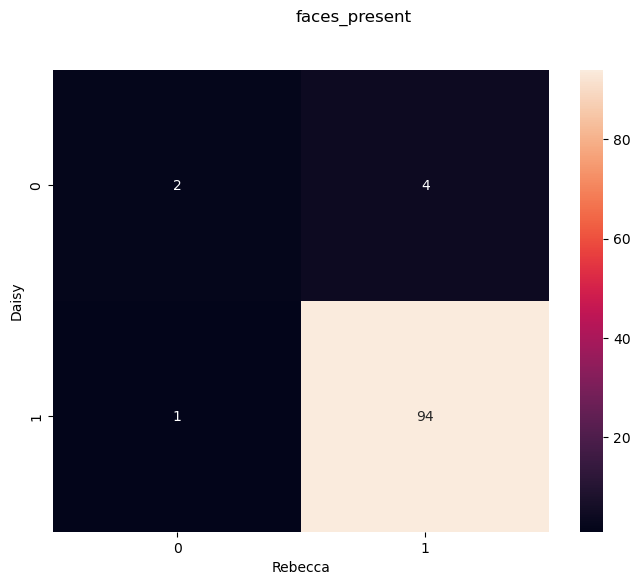

In [32]:
data = {
    'Daisy': x,
    'Rebecca': y
}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['Daisy'], df['Rebecca'])
print(contingency_table)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', ax=ax)#, cmap='YlGnBu')
fig.suptitle('faces_present')
plt.show()